In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
bng=pd.read_csv("C:/Users/Adithya Arunganesh/Desktop/Projects/Bengaluru_HousePrice/Bengaluru_House_Data.csv")

bng.head()
#bng.info()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
bng.shape #gives(#rows, #columns)

(13320, 9)

Area Type

In [4]:
bng.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
bng.groupby('area_type').count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


Dropping few columns which maynot contribute to predicting the price

In [6]:
bng=bng.drop(['area_type','society','balcony','availability'], axis='columns')

bng.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Missing values

In [7]:
bng.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
p=bng.isnull().mean()
for key, value in p.items():
    if value>0:
        print(f'{key :>9} : {value*100:>4.2f}')

 location : 0.01
     size : 0.12
     bath : 0.55


Dropping NA values

In [9]:
bng=bng.dropna()

bng.isnull().sum()

bng.shape

(13246, 5)

Checking 'size' column

In [10]:
bng['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

For example now lambda x will contain the coulmn value '2 BHK', now on this function we need to apply some transformation. We need to split the string '2 bhk' with space so we use x.split(" "), now this transformation will give 2 tokens out of which
we need to use the 1st one so [0]. Now we will get only numbers however its still in string format. Hence, we use int()

In [11]:
bng['bhk']=bng['size'].apply(lambda x: int(x.split(' ')[0]))

bng.head()



,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
bng1=bng

bng1

bng1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

VAlues miss-match

In [13]:
bng1[bng1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
bng1.total_sqft.unique()

#we see range, we need to convert it into single number. This is done by taking the avg

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Defining a function to return all the range function

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
bng1[~bng1['total_sqft'].apply(is_float)].head(10)
# ~ this will return all the false values, i.e. the range values

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
bng1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

Defining a function

In [18]:
def convert_sqft_into_num(x):
    tokens=x.split('-') #for the values tahe are separated by -
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2 # converting each one into float
    try:
        return float(x) # if its normal like 2000, convert that into float
    except:
        return None

Lets test the function first

In [19]:
convert_sqft_into_num('3500')

#the result is converted into float

3500.0

In [20]:
convert_sqft_into_num('1195 - 1440')

1317.5

In [21]:
convert_sqft_into_num('4125Perch')

Applying the convert_sqft_into_num function

In [22]:
bng2=bng1.copy()

bng2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [23]:
bng2.total_sqft = bng2.total_sqft.apply(convert_sqft_into_num)


In [24]:
bng2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

df_new = df[df['ColumnName'].notnull()]
such errors mostly caused by NaN representing empty cells. It is common to filter out such data, before applying your further operations,

In [25]:
bng2=bng2[bng2.total_sqft.notnull()] # Now bng2 will have only not null values!

bng2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [26]:
bng2['price_per_sqft']=bng2.price*100000/bng2.total_sqft

bng2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [27]:
bng3=bng2.copy()

Location

In [28]:
len(bng3.location.unique())

1298

To figure out how many datpoints are available for location

In [29]:
bng3.location=bng3.location.apply(lambda x: x.strip()) #Strip white spaces from leading and tailing edge in column

loc_stats=bng3.groupby('location').count()
#We are checking the location stats, grouping it by location and getting the count. 
loc_stats

,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
1 Annasandrapalya,1,1,1,1,1,1
1 Giri Nagar,1,1,1,1,1,1
1 Immadihalli,1,1,1,1,1,1
1 Ramamurthy Nagar,1,1,1,1,1,1
12th cross srinivas nagar banshankari 3rd stage,1,1,1,1,1,1
...,...,...,...,...,...,...
t.c palya,1,1,1,1,1,1
tc.palya,4,4,4,4,4,4
vinayakanagar,1,1,1,1,1,1


#If I add ['location'] next to ('location'), it will give me the result for only location column

In [30]:
loc_stats=bng3.groupby('location').location.count();loc_stats
                        #OR
loc_stats=bng3.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

To check location that have less than 10 data points

In [31]:
#loc_stats<=10                # This will give in terms of true and false
#loc_stats[loc_stats<=10]     # This will display areas which are less than 10 datapoints
#len(loc_stats[loc_stats<=10])# This will give the length of overall datapoints that are less than 10 datapoints

In [32]:
loc_stat10=loc_stats[loc_stats<=10] 
len(loc_stat10)

1047

In [33]:
len(bng3.location.unique())

1287

In [34]:
bng3.location=bng3.location.apply(lambda x: 'other' if x in loc_stat10 else x)
len(bng3.location.unique())


241

Bedroom size

In [35]:
bng4=bng3.copy()

In [36]:
bng4[bng4.total_sqft/bng4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


TAgging them as outliers and getting rid of them

In [37]:
bng4=bng4[~(bng4.total_sqft/bng4.bhk<300)]


In [38]:
bng3.shape #(13200, 7)
bng4.shape #(12456, 7)

(12456, 7)

In [39]:
bng4.price_per_sqft.describe()

#The min and max are unlikely numbers.

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

defining a function to remove outliers

In [40]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out



In [41]:
bng4=remove_outlier(bng4)
bng4.shape

(10242, 7)

To check the property price for 2bhk and 3bhk

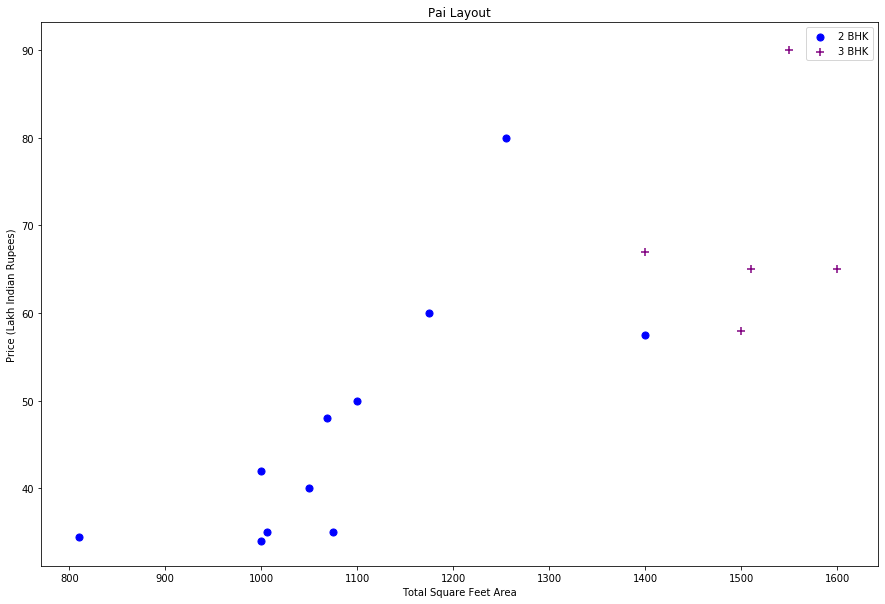

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='purple',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(bng4,"Pai Layout")


In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [44]:
bng4=remove_bhk_outliers(bng4)

bng4.shape

(7317, 7)

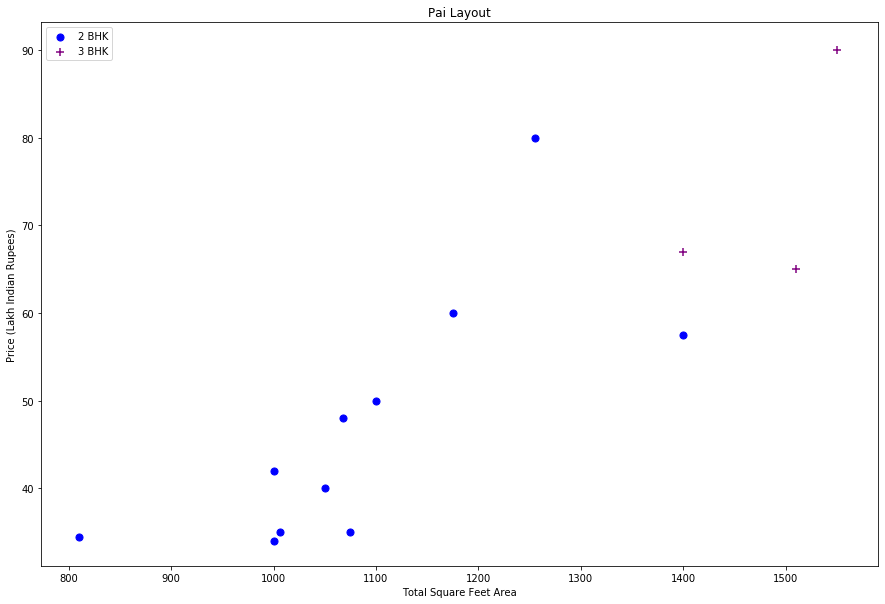

In [45]:
plot_scatter_chart(bng4,"Pai Layout")


To check the Bathroom

In [46]:
bng4.bath.unique

<bound method Series.unique of 0        4.0
1        3.0
2        2.0
3        2.0
4        2.0
        ... 
10233    2.0
10234    1.0
10237    2.0
10238    1.0
10241    5.0
Name: bath, Length: 7317, dtype: float64>

It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [47]:
bng4[bng4.bath>bng4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [48]:
bng5=bng4[bng4.bath<bng4.bhk+2]
bng5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10233,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10234,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10237,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [49]:
bng5=bng5.drop(['size','price_per_sqft'], axis='columns')

Creating dummies for categorical variables

In [50]:
dummy=pd.get_dummies(bng5.location)

In [51]:
bng6=pd.concat([bng5,dummy.drop('other',axis='columns')],axis='columns')
bng6

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
bng6=bng6.drop('location', axis='columns')

bng6.shape

(7239, 244)

Creating X and Y variables

In [58]:
x=bng6.drop('price',axis='columns')
y=bng6.price

x.shape, y.shape
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

x_train,  x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

linreg.fit(x_train, y_train)
linreg.score(x_test, y_test)

0.8629132245229443

K-folds

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)



array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [81]:
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [97]:
pipe=Pipeline([('scaler',MinMaxScaler()), ('regressor', LinearRegression())])

params=[{'regressor':[LinearRegression()]},
        {'regressor':[Lasso()],'regressor__alpha':range(10,100,1000)},
        {'regressor':[Ridge()],'regressor__alpha':range(10,100)}]

grid=GridSearchCV(pipe, params,cv=5, return_train_score=True)

grid.fit(x_train, y_train)

#Best Score
bng_train=grid.score(x_train, y_train)

print('Train score :{:.2f}%' .format(grid.score(x_train, y_train)*100))
print('Test score :{:.2f}%' .format(grid.score(x_test, y_test)*100))
print('The best parameters:', grid.best_params_)
print('Best cross-validation score: {:.2f}%' .format(grid.best_score_*100))


Train score :85.23%
Test score :86.29%
The best parameters: {'regressor': LinearRegression()}
Best cross-validation score: 83.56%


Predicting Price

In [113]:
def predict_price(location, sqft, bhk):
    loc_index=np.where(x.columns==location)[0][0]
    
    x1=np.zeros(len(x.columns))
    x1[0]=sqft
    x1[1]=bhk
    if loc_index >= 0:
        x1[loc_index]=1
        
    return linreg.predict([x1])[0]

In [114]:
predict_price('1st Phase JP Nagar',1000,  2)

86.86975546316182

In [119]:
predict_price('Pai Layout',1550,  3)

80.8276528729009